# JetBot Action Space Testing

This notebook allows you to test and explore the JetBot's action space interactively.

In [1]:
import sys
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from jetbot_interface import JetBotInterface
import cv2

# Configuration
JETBOT_IP = '192.168.68.51'  # Replace with your JetBot's IP address

print("Notebook ready for JetBot action testing!")

Notebook ready for JetBot action testing!


## 1. Connect to JetBot

In [2]:
# Create JetBot interface
try:
    jetbot = JetBotInterface(JETBOT_IP)
    print(f"✅ Connected to JetBot at {JETBOT_IP}")
    print(f"Action space size: {len(jetbot.action_space)}")
except Exception as e:
    print(f"❌ Failed to connect to JetBot: {e}")
    jetbot = None

Image(value=b'', format='jpeg', height='300', width='400')

✅ Connected to JetBot at 192.168.68.51
Action space size: 3


## 2. Explore Action Space

In [3]:
if jetbot:
    print("Available actions:")
    for i, action in enumerate(jetbot.action_space):
        print(f"  {i}: {action}")
else:
    print("❌ JetBot not connected")

Available actions:
  0: {'motor_left': -0.2, 'motor_right': 0, 'duration': 0.1}
  1: {'motor_left': 0, 'motor_right': 0, 'duration': 0.1}
  2: {'motor_left': 0.2, 'motor_right': 0, 'duration': 0.1}


## 3. Test Individual Actions

Execute actions one by one and observe the results.

In [4]:
def test_action(action_index):
    """Test a specific action by index"""
    if not jetbot:
        print("❌ JetBot not connected")
        return
    
    if action_index < 0 or action_index >= len(jetbot.action_space):
        print(f"❌ Invalid action index. Must be 0-{len(jetbot.action_space)-1}")
        return
    
    action = jetbot.action_space[action_index]
    print(f"🤖 Executing action {action_index}: {action}")
    
    success = jetbot.execute_action(action)
    if success:
        print("✅ Action executed successfully")
    else:
        print("❌ Action execution failed")

# Example: Test action 0 (turn left)
# test_action(0)

### Interactive Action Testing

Run this cell and enter action indices to test different actions:

In [5]:
if jetbot:
    print("Interactive action testing. Enter action index (0-2) or 'q' to quit:")
    print("Available actions:")
    for i, action in enumerate(jetbot.action_space):
        print(f"  {i}: {action}")
    
    while True:
        try:
            user_input = input("\nEnter action index: ").strip()
            if user_input.lower() == 'q':
                break
            
            action_idx = int(user_input)
            test_action(action_idx)
            
        except ValueError:
            print("Please enter a valid number or 'q' to quit")
        except KeyboardInterrupt:
            break
    
    print("Interactive testing stopped")
else:
    print("❌ JetBot not connected")

Interactive action testing. Enter action index (0-2) or 'q' to quit:
Available actions:
  0: {'motor_left': -0.2, 'motor_right': 0, 'duration': 0.1}
  1: {'motor_left': 0, 'motor_right': 0, 'duration': 0.1}
  2: {'motor_left': 0.2, 'motor_right': 0, 'duration': 0.1}



Enter action index:  0


🤖 Executing action 0: {'motor_left': -0.2, 'motor_right': 0, 'duration': 0.1}
✅ Action executed successfully



Enter action index:  2


🤖 Executing action 2: {'motor_left': 0.2, 'motor_right': 0, 'duration': 0.1}
✅ Action executed successfully



Enter action index:  2


🤖 Executing action 2: {'motor_left': 0.2, 'motor_right': 0, 'duration': 0.1}
✅ Action executed successfully



Enter action index:  1


🤖 Executing action 1: {'motor_left': 0, 'motor_right': 0, 'duration': 0.1}
✅ Action executed successfully



Enter action index:  0


🤖 Executing action 0: {'motor_left': -0.2, 'motor_right': 0, 'duration': 0.1}
✅ Action executed successfully



Enter action index:  0


🤖 Executing action 0: {'motor_left': -0.2, 'motor_right': 0, 'duration': 0.1}
✅ Action executed successfully



Enter action index:  1


🤖 Executing action 1: {'motor_left': 0, 'motor_right': 0, 'duration': 0.1}
✅ Action executed successfully



Enter action index:  2


🤖 Executing action 2: {'motor_left': 0.2, 'motor_right': 0, 'duration': 0.1}
✅ Action executed successfully



Enter action index:  2


🤖 Executing action 2: {'motor_left': 0.2, 'motor_right': 0, 'duration': 0.1}
✅ Action executed successfully



Enter action index:  


Please enter a valid number or 'q' to quit



Enter action index:  q


Interactive testing stopped


## 4. Test Camera Observations

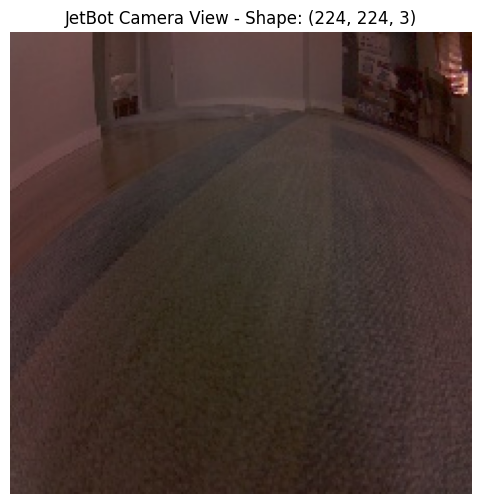

✅ Frame captured - Shape: (224, 224, 3), Type: uint8


In [6]:
def capture_and_display():
    """Capture and display current camera frame"""
    if not jetbot:
        print("❌ JetBot not connected")
        return
    
    frame = jetbot.get_observation()
    if frame is not None:
        plt.figure(figsize=(8, 6))
        plt.imshow(frame)
        plt.title(f"JetBot Camera View - Shape: {frame.shape}")
        plt.axis('off')
        plt.show()
        print(f"✅ Frame captured - Shape: {frame.shape}, Type: {frame.dtype}")
    else:
        print("❌ Failed to capture frame")

# Capture a single frame
capture_and_display()

## 5. Action-Observation Sequence Test

Test executing actions and capturing observations in sequence.

In [8]:
def test_action_observation_sequence(num_steps=3):
    """Test a sequence of random actions with observations"""
    if not jetbot:
        print("❌ JetBot not connected")
        return
    
    print(f"🤖 Testing {num_steps} action-observation steps...")
    
    for step in range(num_steps):
        print(f"\n--- Step {step + 1} ---")
        
        # Capture before action
        frame_before = jetbot.get_observation()
        if frame_before is not None:
            print(f"✅ Frame captured before action - Shape: {frame_before.shape}")
        else:
            print("❌ Failed to capture frame before action")
            continue
        
        # Execute random action
        action_idx = np.random.randint(0, len(jetbot.action_space))
        action = jetbot.action_space[action_idx]
        print(f"🎯 Executing action {action_idx}: {action}")
        
        success = jetbot.execute_action(action)
        if not success:
            print("❌ Action execution failed")
            continue
        
        # Capture after action
        frame_after = jetbot.get_observation()
        if frame_after is not None:
            print(f"✅ Frame captured after action - Shape: {frame_after.shape}")
            
            # Simple difference metric
            if frame_before is not None:
                diff = np.mean(np.abs(frame_after.astype(float) - frame_before.astype(float)))
                print(f"📊 Average pixel difference: {diff:.2f}")
        else:
            print("❌ Failed to capture frame after action")
        
        # Small delay between steps
        time.sleep(0.5)
    
    print("\n✅ Action-observation sequence test completed")

# Run the test
test_action_observation_sequence(3)

🤖 Testing 3 action-observation steps...

--- Step 1 ---
✅ Frame captured before action - Shape: (224, 224, 3)
🎯 Executing action 1: {'motor_left': 0, 'motor_right': 0, 'duration': 0.1}
✅ Frame captured after action - Shape: (224, 224, 3)
📊 Average pixel difference: 2.83

--- Step 2 ---
✅ Frame captured before action - Shape: (224, 224, 3)
🎯 Executing action 0: {'motor_left': -0.2, 'motor_right': 0, 'duration': 0.1}
✅ Frame captured after action - Shape: (224, 224, 3)
📊 Average pixel difference: 14.37

--- Step 3 ---
✅ Frame captured before action - Shape: (224, 224, 3)
🎯 Executing action 2: {'motor_left': 0.2, 'motor_right': 0, 'duration': 0.1}
✅ Frame captured after action - Shape: (224, 224, 3)
📊 Average pixel difference: 15.80

✅ Action-observation sequence test completed


## 6. Live Action Testing with Visual Feedback

Test actions with real-time visual feedback.

🤖 Executing action 0: {'motor_left': -0.2, 'motor_right': 0, 'duration': 0.1}


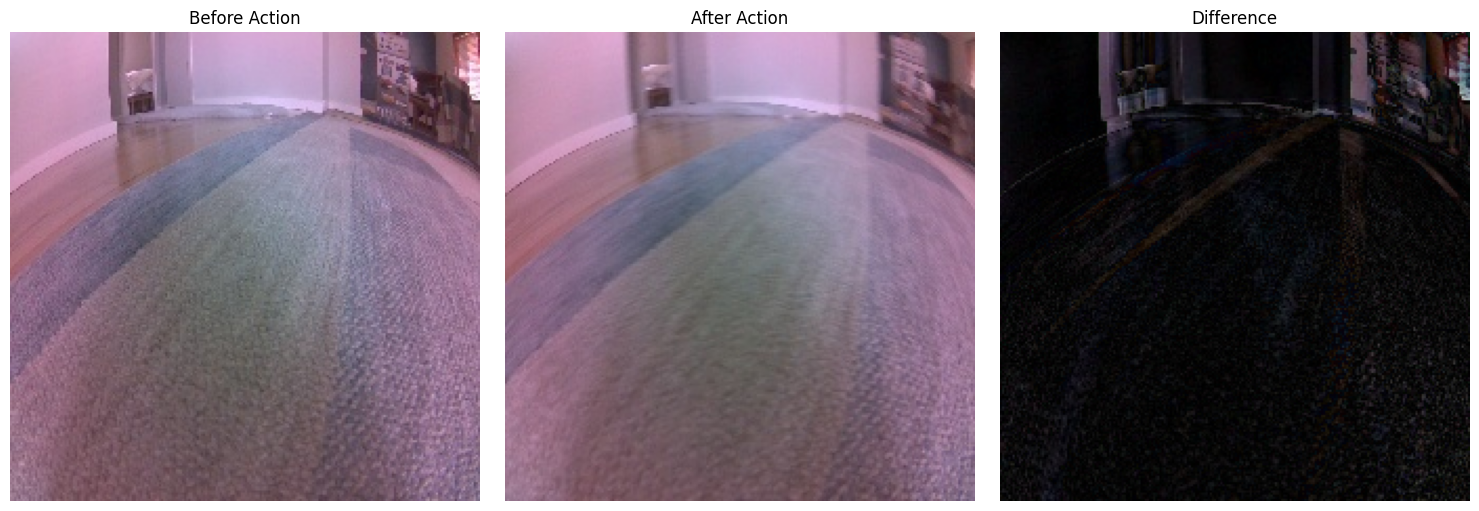

📊 Average pixel difference: 12.79


In [15]:
def test_action_with_visual(action_index, show_diff=True):
    """Test action with before/after visual comparison"""
    if not jetbot:
        print("❌ JetBot not connected")
        return
    
    if action_index < 0 or action_index >= len(jetbot.action_space):
        print(f"❌ Invalid action index. Must be 0-{len(jetbot.action_space)-1}")
        return
    
    # Capture before
    frame_before = jetbot.get_observation()
    if frame_before is None:
        print("❌ Failed to capture frame before action")
        return
    
    # Execute action
    action = jetbot.action_space[action_index]
    print(f"🤖 Executing action {action_index}: {action}")
    success = jetbot.execute_action(action)
    
    if not success:
        print("❌ Action execution failed")
        return
    
    # Capture after
    frame_after = jetbot.get_observation()
    if frame_after is None:
        print("❌ Failed to capture frame after action")
        return
    
    # Display results
    if show_diff:
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        
        axes[0].imshow(frame_before)
        axes[0].set_title("Before Action")
        axes[0].axis('off')
        
        axes[1].imshow(frame_after)
        axes[1].set_title("After Action")
        axes[1].axis('off')
        
        # Difference image
        diff_img = np.abs(frame_after.astype(float) - frame_before.astype(float))
        axes[2].imshow(diff_img / 255.0)
        axes[2].set_title("Difference")
        axes[2].axis('off')
        
        plt.tight_layout()
        plt.show()
        
        avg_diff = np.mean(diff_img)
        print(f"📊 Average pixel difference: {avg_diff:.2f}")
    else:
        fig, axes = plt.subplots(1, 2, figsize=(12, 5))
        
        axes[0].imshow(frame_before)
        axes[0].set_title("Before Action")
        axes[0].axis('off')
        
        axes[1].imshow(frame_after)
        axes[1].set_title("After Action")
        axes[1].axis('off')
        
        plt.tight_layout()
        plt.show()

# Example: Test action 1 (stop) with visual feedback
test_action_with_visual(0)

## 7. Cleanup

Always run this cell when finished to properly disconnect from the JetBot.

In [ ]:
if jetbot:
    jetbot.cleanup()
    print("✅ JetBot connection cleaned up")
else:
    print("No JetBot connection to clean up")

## Usage Examples

Here are some example commands you can run in separate cells:

```python
# Test specific actions
test_action(0)  # Turn left
test_action(1)  # Stop
test_action(2)  # Move forward

# Test action with visual feedback
test_action_with_visual(0)  # Turn left with before/after images

# Capture and display current view
capture_and_display()

# Run action-observation sequence
test_action_observation_sequence(5)  # 5 random actions
```